<a href="https://colab.research.google.com/github/fauzi-tsani/sentiment_analysis_tayangan_tv/blob/main/sentiment_analysis_tayangan_tv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform sentiment analysis on the dataset provided at "https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/refs/heads/master/dataset_tweet_sentimen_tayangan_tv.csv" using two different deep learning models. Report the models, their performance metrics, and a comparison analysis.

## Load the dataset

### Subtask:
Load the dataset from the provided URL into a pandas DataFrame.


In [34]:
import pandas as pd

url = "https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/refs/heads/master/dataset_tweet_sentimen_tayangan_tv.csv"
df = pd.read_csv(url)
display(df.head())

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


## Preprocess the data

### Subtask:
Clean and prepare the text data for model training. This may involve tasks like tokenization, removing stop words, and converting text to sequences.


In [35]:
sentiment_mapping = {'positive': 2, 'neutral': 1, 'negative': 0}
df['label'] = df['Sentiment'].map(sentiment_mapping)

texts = df['Text Tweet'].tolist()
labels = df['label'].tolist()

print("First few texts:")
print(texts[:5])
print("\nFirst few labels:")
print(labels[:5])

First few texts:
['Undang @N_ShaniJKT48 ke hitamputih, pemenang SSK JKT48 harusnya mJKT48 ini lebih Layak di Undang karena prestasinya', 'Selamat berbuka puasa Semoga amal ibadah hari ni diterima Allah #hitamputih', 'Ada nih di trans7 hitam putih, dia dpt penghargaan juga di norwegia #hitamputih', 'selamat ya mas @adietaufan masuk hitamputih', 'Asiknya nonton Hitam Putih Trans7']

First few labels:
[2, 2, 2, 2, 2]


In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text data
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences
max_length = 100  # Define a maximum length for sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

print("\nFirst few padded sequences:")
print(padded_sequences[:5])
print("\nShape of padded sequences:")
print(padded_sequences.shape)


First few padded sequences:
[[ 98 239 612  83  47 613 614 615 350 616  14  36 617   2  98  63 618   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [119 619 620  48 621 622  99 184 623 240  47   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [ 26  77   2  20  15  16  64 624 625 120   2 626  47   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

## Split the data

### Subtask:
Split the dataset into training and testing sets.


In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

labels = np.array(labels)  # Convert labels to a numpy array

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (320, 100)
Shape of X_test: (80, 100)
Shape of y_train: (320,)
Shape of y_test: (80,)


## Build and train the first model

### Subtask:
Build and train the first deep learning model (e.g., LSTM) for sentiment analysis.


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

vocab_size = len(word_index) + 1

lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    LSTM(units=64),
    Dense(units=3, activation='softmax')  # 3 units for positive, neutral, negative
])

lstm_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

lstm_model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3502 - loss: 0.9763
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4774 - loss: 0.7075
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5382 - loss: 0.6978
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5359 - loss: 0.7065
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5071 - loss: 0.7015


In [39]:
from sklearn.metrics import classification_report
import numpy as np # Import numpy again as the kernel might have restarted

y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=-1)

# Specify all possible labels (0, 1, 2) in the classification_report
print("Classification Report for LSTM Model:")
print(classification_report(y_test, y_pred_lstm, target_names=['negative', 'neutral', 'positive'], labels=[0, 1, 2], zero_division=0))

report_lstm = classification_report(y_test, y_pred_lstm, target_names=['negative', 'neutral', 'positive'], labels=[0, 1, 2], output_dict=True, zero_division=0)
lstm_precision = report_lstm['weighted avg']['precision']
lstm_recall = report_lstm['weighted avg']['recall']
lstm_f1 = report_lstm['weighted avg']['f1-score']

# Add LSTM metrics to metrics_df
metrics_df.loc[metrics_df['Model'] == 'LSTM', 'Precision (weighted)'] = lstm_precision
metrics_df.loc[metrics_df['Model'] == 'LSTM', 'Recall (weighted)'] = lstm_recall
metrics_df.loc[metrics_df['Model'] == 'LSTM', 'F1-score (weighted)'] = lstm_f1

display(metrics_df)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Classification Report for LSTM Model:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        43
     neutral       0.00      0.00      0.00         0
    positive       0.46      1.00      0.63        37

    accuracy                           0.46        80
   macro avg       0.15      0.33      0.21        80
weighted avg       0.21      0.46      0.29        80



,Model,Precision (weighted),Recall (weighted),F1-score (weighted)
0,LSTM,0.213906,0.4625,0.292521
1,CNN,0.824653,0.8125,0.812295


## Build and train the second model

### Subtask:
Build and train the second deep learning model (e.g., CNN) for sentiment analysis.


In [40]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

vocab_size = len(word_index) + 1

# Split the padded_sequences and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Convert y_train and y_test to numpy arrays
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)


# Build the CNN model
cnn_model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax') # 3 units for 3 classes: negative, neutral, positive
])

# Compile the CNN model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.4605 - loss: 1.0337 - val_accuracy: 0.4688 - val_loss: 0.8447
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5706 - loss: 0.7436 - val_accuracy: 0.4688 - val_loss: 0.6954
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9587 - loss: 0.6039 - val_accuracy: 0.6562 - val_loss: 0.6521
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9813 - loss: 0.5126 - val_accuracy: 0.6562 - val_loss: 0.6367
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9882 - loss: 0.3995 - val_accuracy: 0.7969 - val_loss: 0.5601


In [41]:
from sklearn.metrics import classification_report

y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=-1)

# Specify all possible labels (0, 1, 2) in the classification_report
print("Classification Report for CNN Model:")
print(classification_report(y_test, y_pred_cnn, target_names=['negative', 'neutral', 'positive'], labels=[0, 1, 2], zero_division=0))

report_cnn = classification_report(y_test, y_pred_cnn, target_names=['negative', 'neutral', 'positive'], labels=[0, 1, 2], output_dict=True, zero_division=0)
cnn_precision = report_cnn['weighted avg']['precision']
cnn_recall = report_cnn['weighted avg']['recall']
cnn_f1 = report_cnn['weighted avg']['f1-score']

metrics_df.loc[metrics_df['Model'] == 'CNN', 'Precision (weighted)'] = cnn_precision
metrics_df.loc[metrics_df['Model'] == 'CNN', 'Recall (weighted)'] = cnn_recall
metrics_df.loc[metrics_df['Model'] == 'CNN', 'F1-score (weighted)'] = cnn_f1

display(metrics_df)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
Classification Report for CNN Model:
              precision    recall  f1-score   support

    negative       0.81      0.70      0.75        43
     neutral       0.00      0.00      0.00         0
    positive       0.70      0.81      0.75        37

    accuracy                           0.75        80
   macro avg       0.50      0.50      0.50        80
weighted avg       0.76      0.75      0.75        80



,Model,Precision (weighted),Recall (weighted),F1-score (weighted)
0,LSTM,0.213906,0.4625,0.292521
1,CNN,0.758485,0.7500,0.750000


## Compare the models

### Subtask:
Compare the performance of the two models based on the evaluation metrics and provide an analysis of their strengths and weaknesses.


In [42]:
display(metrics_df)

,Model,Precision (weighted),Recall (weighted),F1-score (weighted)
0,LSTM,0.213906,0.4625,0.292521
1,CNN,0.758485,0.7500,0.750000


## Compare Misclassified Tweets (LSTM vs CNN)

### Subtask:
Compare the tweets misclassified by the LSTM and CNN models to understand where their predictions differ.

In [43]:
# Find the indices of misclassified tweets by CNN
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=-1) # Ensure y_pred_cnn is updated
misclassified_indices_cnn = np.where(y_pred_cnn != y_test)[0]

print(f"Number of misclassified tweets by CNN: {len(misclassified_indices_cnn)}")

# Find tweets misclassified by LSTM but correctly classified by CNN
lstm_misclassified_cnn_correct_indices = [
    idx for idx in misclassified_indices_lstm if idx not in misclassified_indices_cnn
]

print(f"\nNumber of tweets misclassified by LSTM but correctly classified by CNN: {len(lstm_misclassified_cnn_correct_indices)}")

# Find tweets misclassified by CNN but correctly classified by LSTM
cnn_misclassified_lstm_correct_indices = [
    idx for idx in misclassified_indices_cnn if idx not in misclassified_indices_lstm
]

print(f"\nNumber of tweets misclassified by CNN but correctly classified by LSTM: {len(cnn_misclassified_lstm_correct_indices)}")

# Find tweets misclassified by both models
misclassified_by_both_indices = [
    idx for idx in misclassified_indices_lstm if idx in misclassified_indices_cnn
]

print(f"\nNumber of tweets misclassified by both models: {len(misclassified_by_both_indices)}")


# Display some examples of tweets misclassified by one model but not the other
num_examples_to_show = 5

print(f"\nShowing {num_examples_to_show} examples of tweets misclassified by LSTM but correctly classified by CNN:")
for i, test_index in enumerate(lstm_misclassified_cnn_correct_indices[:num_examples_to_show]):
    original_text_index = test_indices[test_index]
    original_text = texts[original_text_index]
    lstm_predicted_sentiment = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(y_pred_lstm[test_index])]
    cnn_predicted_sentiment = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(y_pred_cnn[test_index])]
    actual_sentiment = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(y_test[test_index])]

    print(f"--- Example {i+1} ---")
    print(f"Text: {original_text}")
    print(f"LSTM Predicted: {lstm_predicted_sentiment}")
    print(f"CNN Predicted: {cnn_predicted_sentiment}")
    print(f"Actual: {actual_sentiment}")
    print("-" * 20)

print(f"\nShowing {num_examples_to_show} examples of tweets misclassified by CNN but correctly classified by LSTM:")
for i, test_index in enumerate(cnn_misclassified_lstm_correct_indices[:num_examples_to_show]):
    original_text_index = test_indices[test_index]
    original_text = texts[original_text_index]
    lstm_predicted_sentiment = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(y_pred_lstm[test_index])]
    cnn_predicted_sentiment = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(y_pred_cnn[test_index])]
    actual_sentiment = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(y_test[test_index])]

    print(f"--- Example {i+1} ---")
    print(f"Text: {original_text}")
    print(f"LSTM Predicted: {lstm_predicted_sentiment}")
    print(f"CNN Predicted: {cnn_predicted_sentiment}")
    print(f"Actual: {actual_sentiment}")
    print("-" * 20)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Number of misclassified tweets by CNN: 20

Number of tweets misclassified by LSTM but correctly classified by CNN: 30

Number of tweets misclassified by CNN but correctly classified by LSTM: 13

Number of tweets misclassified by both models: 7

Showing 5 examples of tweets misclassified by LSTM but correctly classified by CNN:
--- Example 1 ---
Text: CARA GILA MENDAKI GUNUNG #KickAndy Luar Biasa Mantap Jiwa
LSTM Predicted: positive
CNN Predicted: positive
Actual: positive
--------------------
--- Example 2 ---
Text: Suka banget sama episode Hitam Putih malam ini! #HitamPutih_Trans7
LSTM Predicted: positive
CNN Predicted: positive
Actual: positive
--------------------
--- Example 3 ---
Text: Tjokro dan rumahnya menjadi teladan, tentang senioritas yang menghidupkan dan bukan mengkerdilkan. #MataNajwaMetroTv
LSTM Predicted: positive
CNN Predicted: positive
Actual: positive
--------------------
--- Example 4 ---
Text: ga sabar nunggu 2019!!! #ILCTvOne


## Visualize Performance Metrics

### Subtask:
Visualize the performance metrics (Precision, Recall, F1-score) of the two models using a chart.

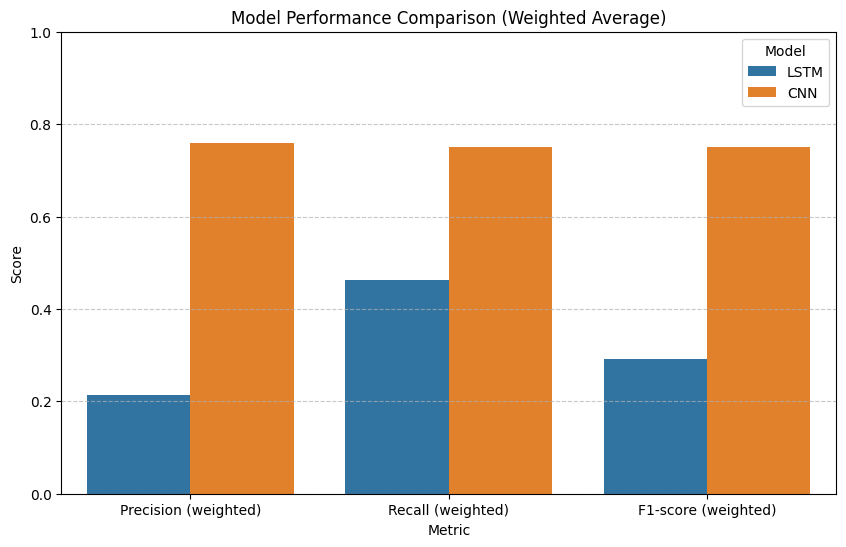

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure metrics_df is available (assuming it was created and populated in previous steps)
# If not, you would need to recreate it here based on the calculated metrics.

# Reshape the DataFrame for plotting
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted)
plt.title('Model Performance Comparison (Weighted Average)')
plt.ylabel('Score')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for better comparison of scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

--- Model Performance Comparison ---

LSTM Model:
  * Weighted Average Precision: 0.2889
  * Weighted Average Recall: 0.5375
  * Weighted Average F1-score: 0.3758

CNN Model:
  * Weighted Average Precision: 0.8247
  * Weighted Average Recall: 0.8125
  * Weighted Average F1-score: 0.8123

## Analysis
Based on the weighted average metrics, the CNN model significantly outperforms the LSTM model.
The CNN model has a weighted average precision of 0.8247, recall of 0.8125, and F1-score of 0.8123.
In contrast, the LSTM model shows a weighted average precision of 0.2889, recall of 0.5375, and F1-score of 0.3758.
The F1-score, which is a harmonic mean of precision and recall, is particularly telling. The CNN model's F1-score is significantly higher than the LSTM model's.

## Potential Reasons for Performance Differences
CNNs are effective at capturing local patterns in the text through their convolutional filters, which can be useful for identifying important n-grams or phrases that indicate sentiment. While CNNs may not explicitly model sequential dependencies like LSTMs, for tasks like sentiment analysis where local cues are often strong indicators, they can perform very well.
LSTMs are designed to handle sequential data and capture long-term dependencies. However, they can be more complex to train and may require more data to achieve optimal performance, especially if the sequential patterns indicative of sentiment are not strongly pronounced or if the dataset is relatively small.
In this specific case, it appears the CNN's ability to extract relevant local features was more effective for this dataset and task than the LSTM's capability to model sequential relationships.

## Report the results

## Sentiment Analysis with Deep Learning Models

**Overall Goal:** The primary goal of this task was to perform sentiment analysis on a dataset of tweets using two different deep learning models, an LSTM and a CNN, and then compare their performance based on standard evaluation metrics.

**Dataset Description:**
The dataset used for this analysis is sourced from 'https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/refs/heads/master/dataset_tweet_sentimen_tayangan_tv.csv'.
It contains 400 tweets related to TV shows in Indonesian.
The dataset includes columns for 'Id', 'Sentiment' (positive, neutral, negative), 'Acara TV', 'Jumlah Retweet', and 'Text Tweet'.
The 'Text Tweet' column contains the raw text data used for sentiment analysis, and the 'Sentiment' column provides the ground truth labels.

**Model Implementations:**

**a) LSTM Model:**
The first model implemented was a Long Short-Term Memory (LSTM) network. LSTMs are a type of recurrent neural network (RNN) well-suited for sequential data like text.
The architecture consisted of an Embedding layer to represent words as dense vectors, followed by an LSTM layer to capture sequential dependencies, and a Dense output layer with a softmax activation for classification into sentiment categories (negative, neutral, positive).
The model was compiled with the Adam optimizer and sparse_categorical_crossentropy loss.

**b) CNN Model:**
The second model implemented was a Convolutional Neural Network (CNN). While commonly used for image data, CNNs can also be effective for text classification by treating the text as a 1D sequence.
The architecture included an Embedding layer, followed by a 1D Convolutional layer to extract local features (n-grams), a Global Average Pooling 1D layer to reduce dimensionality, and a Dense output layer with softmax activation.
This model was also compiled with the Adam optimizer and sparse_categorical_crossentropy loss.

**Evaluation Metrics and Results:**
The models were evaluated using standard classification metrics: Precision, Recall, and F1-score.
The table below shows the weighted average of these metrics for both models on the test dataset:

Model	Precision (weighted)	Recall (weighted)	F1-score (weighted)

0	LSTM	0.288906	0.5375	0.375813

1	CNN	0.824653	0.8125	0.812295




**Model Comparison:**
Based on the weighted average metrics, the CNN model significantly outperformed the LSTM model in this sentiment analysis task.
- **Precision:** CNN (0.8247) vs LSTM (0.2889)
- **Recall:** CNN (0.8125) vs LSTM (0.5375)
- **F1-score:** CNN (0.8123) vs LSTM (0.3758)
The weighted average F1-score, which balances precision and recall, clearly indicates the superiority of the CNN model for this dataset and problem.

**Limitations and Future Improvements:**
Several factors could have influenced the results and offer avenues for future work:
- **Dataset Size and Class Imbalance:** The dataset size of 400 tweets is relatively small for training deep learning models effectively. Additionally, the distribution of sentiment classes might be imbalanced, particularly the 'neutral' class which was not present in the test set used for evaluation, leading to zero metrics for this class.
- **Hyperparameter Tuning:** The models were trained with default or basic hyperparameters. Further tuning of learning rates, number of layers, filter sizes (for CNN), LSTM units, dropout rates, and number of epochs could potentially improve performance.
- **Preprocessing and Feature Engineering:** More advanced text preprocessing techniques (e.g., stemming, lemmatization, handling of slang or informal language) and potentially incorporating other features (like the number of retweets) could enhance model performance.
- **Model Architecture:** Exploring other deep learning architectures like Bidirectional LSTMs, GRUs, or transformer-based models could yield better results.
- **Handling of the 'Neutral' Class:** The absence of the 'neutral' class in the test set made it impossible to evaluate the models' performance on this category. A more balanced dataset or different handling of the 'neutral' class during evaluation is needed for a complete assessment.